<a href="https://colab.research.google.com/github/renardelyon/ML-jamur/blob/main/ML_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package install

In [5]:
!pip install pycaret

# Import modules

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
from pycaret.regression import *
import os

# Data Extraction

In [8]:
df = pd.read_csv('./Copy of yield.csv', sep=';')[['hari', 'yield']]

# Data Visualization

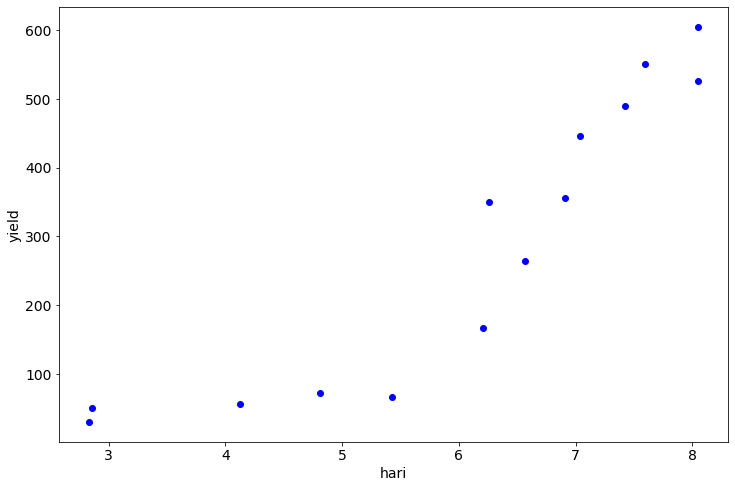

In [9]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12,8))
plt.plot(df['hari'], df['yield'], 'bo')
plt.ylabel('yield')
plt.xlabel('hari')
plt.show()

# Setup data

In [25]:
reg1 = setup(data = df, target = 'yield', normalize=True, train_size=0.8)

,Description,Value
0,session_id,4221
1,Target,yield
2,Original Data,"(14, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11, 1)"


# Compare models

In [26]:
best = compare_models(errors='raise', fold=4, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,70.3213,8229.6097,78.7383,-1.6453,0.3764,0.3651,0.3575
ada,AdaBoost Regressor,84.6555,10733.1495,96.7557,-3.9235,0.4436,0.4462,0.0725
dt,Decision Tree Regressor,92.2569,12018.1887,105.1217,-3.9573,0.4624,0.4617,0.0150
gbr,Gradient Boosting Regressor,92.2572,12018.0817,105.1220,-3.9579,0.4624,0.4617,0.0375
rf,Random Forest Regressor,83.4592,8438.3080,90.5905,-10.9332,0.4815,0.6892,0.4125
en,Elastic Net,81.1190,8488.7727,88.5047,-13.6602,0.4867,0.7259,0.0150
ridge,Ridge Regression,87.2659,10118.5453,90.4061,-25.7561,0.4989,1.0782,0.0150
huber,Huber Regressor,84.2084,10912.7409,88.2494,-28.0453,0.5365,1.1510,0.0200
br,Bayesian Ridge,91.9229,11778.4365,95.5508,-33.3892,0.5371,1.2105,0.0150
llar,Lasso Least Angle Regression,90.6530,11676.7642,94.2886,-33.6014,0.5320,1.2065,0.0150


# Train model
using extra tree regressor



In [27]:
rf = create_model('rf', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.6955,7673.4928,87.5985,0.7422,0.9088,1.4489
1,90.5202,11818.0931,108.7111,0.7663,0.3745,0.3629
2,72.9074,6050.2462,77.7833,0.0944,0.2294,0.1960
Mean,81.3744,8513.9440,91.3643,0.5343,0.5043,0.6693
SD,7.2064,2428.5501,12.9039,0.3112,0.2921,0.5555


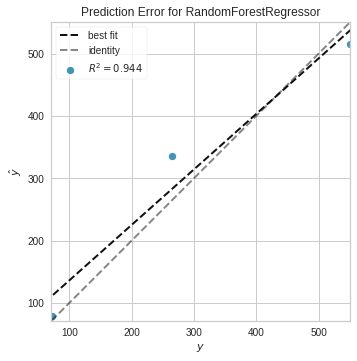

In [28]:
plot_model(rf, plot='error')

# Predict Model

In [29]:
pred_holdout = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,37.9367,2150.3967,46.3724,0.9442,0.1531,0.1442


In [30]:
pred_holdout

,hari,yield,Label
0,7.592444,550.000000,515.216209
1,4.811324,72.129036,79.094497
2,6.566866,264.189178,336.249988


# Save Model

In [ ]:
curr_dir = os.getcwd()
model_name = 'random_forest_regressor'

save_model(rf, os.path.join(curr_dir, model_name))

# Deploy model

In [71]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='/content/tugas-akhir-332404-def33f4e468e.json'

In [74]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=aFVHsz52DgCycP84vYFmQAZemdrKvE&prompt=consent&access_type=offline&code_challenge=tMN9FwGO23LvZmi0ZM4YwaJjMVpyMAwXK0MnX-nyeRs&code_challenge_method=S256

Enter verification code: 4/1AX4XfWhqrRyCFjLgXbnmGBvmPI4WCS4S85V-vL_aoTqNuexAVOJgndO4lxE

You are now logged in as [renard.elyon.r@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [75]:
!gsutil ls gs://tugas-akhir-332404-ml

In [76]:
deploy_model(rf, model_name = 'rf_gcp', platform = 'gcp', 
             authentication = { 'bucket'  : 'tugas-akhir-332404-ml',
                                 'project': 'tugas-akhir-332404'})

Model Successfully Deployed on GCP
